# Cleaning Data

In [1]:
 # put in dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from matplotlib.pyplot import cm

In [2]:
# read in all the atp/men's csvs
file_atp_17 = "Resources/atp_matches_2017.csv"
file_atp_18 = "Resources/atp_matches_2018.csv"
file_atp_19 = "Resources/atp_matches_2019.csv"
file_atp_20 = "Resources/atp_matches_2020.csv"
file_atp_21 = "Resources/atp_matches_2021.csv"

# read in all the wta/women's csvs
file_wta_17 = "Resources/wta_matches_2017.csv"
file_wta_18 = "Resources/wta_matches_2018.csv"
file_wta_19 = "Resources/wta_matches_2019.csv"
file_wta_20 = "Resources/wta_matches_2020.csv"
file_wta_21 = "Resources/wta_matches_2021.csv"

In [3]:
# mens/ atp tourneys
# read data into dataframes
atp_17_data = pd.read_csv(file_atp_17)
atp_17_df = pd.DataFrame(atp_17_data)

atp_18_data = pd.read_csv(file_atp_18)
atp_18_df = pd.DataFrame(atp_18_data)

atp_19_data = pd.read_csv(file_atp_19)
atp_19_df = pd.DataFrame(atp_19_data)

atp_20_data = pd.read_csv(file_atp_20)
atp_20_df = pd.DataFrame(atp_20_data)

atp_21_data = pd.read_csv(file_atp_21)
atp_21_df = pd.DataFrame(atp_21_data)



In [4]:
# check columns and select desired options
atp_17_df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [5]:
filtered_data_17_atp = [atp_17_df["tourney_name"], atp_17_df["surface"], atp_17_df["round"], 
                 atp_17_df["winner_name"], atp_17_df["winner_hand"], atp_17_df["loser_hand"],
                 atp_17_df["winner_ioc"], atp_17_df["winner_age"],atp_17_df["best_of"]]

filtered_data_18_atp = [atp_18_df["tourney_name"], atp_18_df["surface"], atp_18_df["round"], 
                 atp_18_df["winner_name"], atp_18_df["winner_hand"],  atp_18_df["loser_hand"],
                 atp_18_df["winner_ioc"], atp_18_df["winner_age"],atp_18_df["best_of"]]

filtered_data_19_atp = [atp_19_df["tourney_name"], atp_19_df["surface"], atp_19_df["round"], 
                 atp_19_df["winner_name"], atp_19_df["winner_hand"], atp_19_df["loser_hand"], 
                 atp_19_df["winner_ioc"], atp_19_df["winner_age"],atp_19_df["best_of"]]

filtered_data_20_atp = [atp_20_df["tourney_name"], atp_20_df["surface"], atp_20_df["round"], 
                 atp_20_df["winner_name"], atp_20_df["winner_hand"], atp_19_df["loser_hand"], 
                 atp_20_df["winner_ioc"], atp_20_df["winner_age"],atp_20_df["best_of"]]

filtered_data_21_atp = [atp_21_df["tourney_name"], atp_21_df["surface"], atp_21_df["round"], 
                 atp_21_df["winner_name"], atp_21_df["winner_hand"], atp_18_df["loser_hand"],
                 atp_21_df["winner_ioc"], atp_21_df["winner_age"],atp_21_df["best_of"]]

new_headers = ["Tourney_Name", "Surface", "Tournament_Placement", "Winner_Name", "Winner_Hand", "Loser_Hand",
              "Winner_Country", "Winner_Age", "Match Format"]


# due to continued issues converting the date format with the datetime library
# and the greater processing required, these were manually assigned
# it would be possible to loop them however to fill in the year column
new_17_atp = pd.concat(filtered_data_17_atp, axis=1, keys=new_headers).reset_index()
new_17_atp["Year"] = 2017

new_18_atp = pd.concat(filtered_data_18_atp, axis=1, keys=new_headers).reset_index()
new_18_atp["Year"] = 2018

new_19_atp = pd.concat(filtered_data_19_atp, axis=1, keys=new_headers).reset_index()
new_19_atp["Year"] = 2019

new_20_atp = pd.concat(filtered_data_20_atp, axis=1, keys=new_headers).reset_index()
new_20_atp["Year"] = 2020

new_21_atp = pd.concat(filtered_data_21_atp, axis=1, keys=new_headers).reset_index()
new_21_atp["Year"] = 2021


In [6]:
# test to make sure all columns were ported in correctly
new_20_atp

,index,Tourney_Name,Surface,Tournament_Placement,Winner_Name,Winner_Hand,Loser_Hand,Winner_Country,Winner_Age,Match Format,Year
0,0,Atp Cup,Hard,F,Novak Djokovic,R,R,SRB,32.626968,3.0,2020
1,1,Atp Cup,Hard,F,Roberto Bautista Agut,R,R,ESP,31.728953,3.0,2020
2,2,Atp Cup,Hard,SF,Novak Djokovic,R,R,SRB,32.626968,3.0,2020
3,3,Atp Cup,Hard,SF,Dusan Lajovic,R,R,SRB,29.519507,3.0,2020
4,4,Atp Cup,Hard,SF,Rafael Nadal,L,R,ESP,33.593429,3.0,2020
...,...,...,...,...,...,...,...,...,...,...,...
2791,2791,NaN,NaN,NaN,NaN,NaN,R,NaN,NaN,NaN,2020
2792,2792,NaN,NaN,NaN,NaN,NaN,R,NaN,NaN,NaN,2020
2793,2793,NaN,NaN,NaN,NaN,NaN,L,NaN,NaN,NaN,2020
2794,2794,NaN,NaN,NaN,NaN,NaN,R,NaN,NaN,NaN,2020


In [7]:
# combine all of the dataframes into one master dataframe

new_df_atp = new_17_atp.append([new_18_atp,new_19_atp, new_20_atp,new_21_atp])

# drop the index column so it doesn't become confusing with the new index 
new_df_atp = new_df_atp.drop(columns = ["index"])

#dropping from the tourney name gets rid of most null rows that only have one value in them
# there will still be some gaps but the rest of the lines may still have information necessary
new_df_atp = new_df_atp.dropna(subset=["Tourney_Name"])
new_df_atp

,Tourney_Name,Surface,Tournament_Placement,Winner_Name,Winner_Hand,Loser_Hand,Winner_Country,Winner_Age,Match Format,Year
0,Brisbane,Hard,R32,Viktor Troicki,R,L,SRB,30.893908,3.0,2017
1,Brisbane,Hard,R32,Kyle Edmund,R,R,GBR,21.984942,3.0,2017
2,Brisbane,Hard,R32,Lucas Pouille,R,R,FRA,22.858316,3.0,2017
3,Brisbane,Hard,R32,Jared Donaldson,R,L,USA,20.232717,3.0,2017
4,Brisbane,Hard,R32,Jordan Thompson,R,R,AUS,22.704997,3.0,2017
...,...,...,...,...,...,...,...,...,...,...
2722,Davis Cup WG2 R1: THA vs DEN,Hard,RR,August Holmgren,R,R,DEN,23.394935,3.0,2021
2723,Davis Cup WG2 R1: THA vs DEN,Hard,RR,Kasidit Samrej,R,R,THA,20.629706,3.0,2021
2724,Davis Cup WG2 R1: TUR vs LAT,Hard,RR,Altug Celikbilek,U,R,TUR,25.015743,3.0,2021
2725,Davis Cup WG2 R1: TUR vs LAT,Hard,RR,Cem Ilkel,R,R,TUR,26.064339,3.0,2021


In [8]:
# check to make sure that the columns with null values are needed 
# hand columns had the most nulls in prior testing but it is okay if they still have some 
nan_values = new_df_atp.isna()
nan_columns = nan_values.any()

columns_with_nan = new_df_atp.columns[nan_columns].tolist()
print(columns_with_nan)

['Winner_Hand', 'Loser_Hand', 'Winner_Age']


In [9]:
# export as csv 
export_path = "Resources/all_mens_matches.csv"
new_df_atp.to_csv(export_path)

In [10]:
# women's data 
# same process as the mens
# read data into dataframes
wta_17_data = pd.read_csv(file_wta_17)
wta_17_df = pd.DataFrame(wta_17_data)

wta_18_data = pd.read_csv(file_wta_18)
wta_18_df = pd.DataFrame(wta_18_data)

wta_19_data = pd.read_csv(file_wta_19)
wta_19_df = pd.DataFrame(wta_19_data)

wta_20_data = pd.read_csv(file_wta_20)
wta_20_df = pd.DataFrame(wta_20_data)

wta_21_data = pd.read_csv(file_wta_21)
wta_21_df = pd.DataFrame(wta_21_data)

In [11]:
# make sure all the same columns are ported in
filtered_data_17_wta = [wta_17_df["tourney_name"], wta_17_df["surface"], wta_17_df["round"], 
                 wta_17_df["winner_name"], wta_17_df["winner_hand"],wta_17_df["loser_hand"], 
                 wta_17_df["winner_ioc"], wta_17_df["winner_age"],wta_17_df["best_of"]]

filtered_data_18_wta = [wta_18_df["tourney_name"], wta_18_df["surface"], wta_18_df["round"], 
                 wta_18_df["winner_name"], wta_18_df["winner_hand"], wta_18_df["loser_hand"], 
                 wta_18_df["winner_ioc"], wta_18_df["winner_age"],wta_18_df["best_of"]]

filtered_data_19_wta = [wta_19_df["tourney_name"], wta_19_df["surface"], wta_19_df["round"], 
                 wta_19_df["winner_name"], wta_19_df["winner_hand"], wta_19_df["loser_hand"], 
                 wta_19_df["winner_ioc"], wta_19_df["winner_age"],wta_19_df["best_of"]]

filtered_data_20_wta = [wta_20_df["tourney_name"], wta_20_df["surface"], wta_20_df["round"], 
                 wta_20_df["winner_name"], wta_20_df["winner_hand"], atp_20_df["loser_hand"], 
                 wta_20_df["winner_ioc"], wta_20_df["winner_age"],wta_20_df["best_of"]]

filtered_data_21_wta = [wta_21_df["tourney_name"], wta_21_df["surface"], wta_21_df["round"], 
                 wta_21_df["winner_name"], wta_21_df["winner_hand"], atp_21_df["loser_hand"], 
                 wta_21_df["winner_ioc"], wta_21_df["winner_age"],wta_21_df["best_of"]]

#same issue was had so there are manual assignments instead of a loop
new_17_wta = pd.concat(filtered_data_17_wta, axis=1, keys=new_headers).reset_index()
new_17_wta["Year"] = 2017

new_18_wta = pd.concat(filtered_data_18_wta, axis=1, keys=new_headers).reset_index()
new_18_wta["Year"] = 2018

new_19_wta = pd.concat(filtered_data_19_wta, axis=1, keys=new_headers).reset_index()
new_19_wta["Year"] = 2019

new_20_wta = pd.concat(filtered_data_20_wta, axis=1, keys=new_headers).reset_index()
new_20_wta["Year"] = 2020

new_21_wta = pd.concat(filtered_data_21_wta, axis=1, keys=new_headers).reset_index()
new_21_wta["Year"] = 2021

In [12]:
#check to make sure it entered correctly (previous errors turned the year into floats)
new_18_wta["Year"]

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
2751    2018
2752    2018
2753    2018
2754    2018
2755    2018
Name: Year, Length: 2756, dtype: int64

In [13]:
# new master dataframe for women
new_df_wta = new_17_wta.append([new_18_wta, new_19_wta,new_20_wta,new_21_wta])
new_df_wta = new_df_wta.drop(columns = ["index"])
new_df_wta = new_df_wta.dropna(subset=["Tourney_Name"])
new_df_wta

,Tourney_Name,Surface,Tournament_Placement,Winner_Name,Winner_Hand,Loser_Hand,Winner_Country,Winner_Age,Match Format,Year
0,Luxembourg,Hard,R32,Kiki Bertens,R,R,NED,25.850787,3.0,2017
1,Luxembourg,Hard,R32,Andrea Petkovic,R,R,GER,30.102669,3.0,2017
2,Luxembourg,Hard,R32,Evgeniya Rodina,R,R,RUS,28.695414,3.0,2017
3,Luxembourg,Hard,R32,Carina Witthoeft,R,L,GER,22.663929,3.0,2017
4,Luxembourg,Hard,R32,Veronica Cepede Royg,R,R,PAR,25.735797,3.0,2017
...,...,...,...,...,...,...,...,...,...,...
2592,BJK Cup Playoffs: NED vs CHN,Clay,RR,Arantxa Rus,L,R,NED,30.343600,3.0,2021
2593,BJK Cup Playoffs: ROU vs ITA,Hard,RR,Elisabetta Cocciaretto,R,R,ITA,20.224504,3.0,2021
2594,BJK Cup Playoffs: ROU vs ITA,Hard,RR,Martina Trevisan,L,R,ITA,27.452430,3.0,2021
2595,BJK Cup Playoffs: ROU vs ITA,Hard,RR,Elena Gabriela Ruse,U,R,ROU,23.444216,3.0,2021


In [14]:
# null check. discrepancies are okay in regard to age
nan_values = new_df_wta.isna()
nan_columns = nan_values.any()

columns_with_nan = new_df_wta.columns[nan_columns].tolist()
print(columns_with_nan)

['Winner_Age']


In [15]:
# export as csv 
export_path = "Resources/all_womens_matches.csv"
new_df_wta.to_csv(export_path)

# Court Surfaces

In [16]:
#importing newly created csvs and creating combined atp/wta df
wta_csv_path = "Resources/all_womens_matches.csv"
wta_data = pd.read_csv(wta_csv_path)

atp_csv_path = "Resources/all_mens_matches.csv"
atp_data = pd.read_csv(atp_csv_path)

atp_wta_combined_unclean_df=pd.concat([wta_data, atp_data], axis=0)
atp_wta_combined_unclean_df

,Unnamed: 0,Tourney_Name,Surface,Tournament_Placement,Winner_Name,Winner_Hand,Loser_Hand,Winner_Country,Winner_Age,Match Format,Year
0,0,Luxembourg,Hard,R32,Kiki Bertens,R,R,NED,25.850787,3.0,2017
1,1,Luxembourg,Hard,R32,Andrea Petkovic,R,R,GER,30.102669,3.0,2017
2,2,Luxembourg,Hard,R32,Evgeniya Rodina,R,R,RUS,28.695414,3.0,2017
3,3,Luxembourg,Hard,R32,Carina Witthoeft,R,L,GER,22.663929,3.0,2017
4,4,Luxembourg,Hard,R32,Veronica Cepede Royg,R,R,PAR,25.735797,3.0,2017
...,...,...,...,...,...,...,...,...,...,...,...
12771,2722,Davis Cup WG2 R1: THA vs DEN,Hard,RR,August Holmgren,R,R,DEN,23.394935,3.0,2021
12772,2723,Davis Cup WG2 R1: THA vs DEN,Hard,RR,Kasidit Samrej,R,R,THA,20.629706,3.0,2021
12773,2724,Davis Cup WG2 R1: TUR vs LAT,Hard,RR,Altug Celikbilek,U,R,TUR,25.015743,3.0,2021
12774,2725,Davis Cup WG2 R1: TUR vs LAT,Hard,RR,Cem Ilkel,R,R,TUR,26.064339,3.0,2021


In [17]:
#cleaning the df
atp_wta_combined_df=atp_wta_combined_unclean_df.reset_index()
atp_wta_combined_df.drop("index",inplace=True,axis=1)
atp_wta_combined_df.drop("Unnamed: 0",inplace=True,axis=1)
atp_wta_combined_df

,Tourney_Name,Surface,Tournament_Placement,Winner_Name,Winner_Hand,Loser_Hand,Winner_Country,Winner_Age,Match Format,Year
0,Luxembourg,Hard,R32,Kiki Bertens,R,R,NED,25.850787,3.0,2017
1,Luxembourg,Hard,R32,Andrea Petkovic,R,R,GER,30.102669,3.0,2017
2,Luxembourg,Hard,R32,Evgeniya Rodina,R,R,RUS,28.695414,3.0,2017
3,Luxembourg,Hard,R32,Carina Witthoeft,R,L,GER,22.663929,3.0,2017
4,Luxembourg,Hard,R32,Veronica Cepede Royg,R,R,PAR,25.735797,3.0,2017
...,...,...,...,...,...,...,...,...,...,...
25083,Davis Cup WG2 R1: THA vs DEN,Hard,RR,August Holmgren,R,R,DEN,23.394935,3.0,2021
25084,Davis Cup WG2 R1: THA vs DEN,Hard,RR,Kasidit Samrej,R,R,THA,20.629706,3.0,2021
25085,Davis Cup WG2 R1: TUR vs LAT,Hard,RR,Altug Celikbilek,U,R,TUR,25.015743,3.0,2021
25086,Davis Cup WG2 R1: TUR vs LAT,Hard,RR,Cem Ilkel,R,R,TUR,26.064339,3.0,2021


In [18]:
#Finding the number of times a country has won
atp_wta_country=atp_wta_combined_df["Winner_Country"].value_counts()
atp_wta_country.head(20)

USA    2540
ESP    1655
FRA    1611
RUS    1593
GER    1332
CZE    1125
AUS    1026
ITA     955
SRB     736
ARG     719
CRO     622
ROU     606
SUI     595
GBR     587
CAN     582
BEL     577
JPN     560
UKR     526
CHN     500
BLR     483
Name: Winner_Country, dtype: int64

In [19]:
#Creating df for playing on clay courts
atp_wta_clay_df=atp_wta_combined_df.loc[atp_wta_combined_df["Surface"]=="Clay"]
atp_wta_clay_df
atp_wta_winner_country_clay=atp_wta_clay_df["Winner_Country"].value_counts()
atp_wta_winner_country_clay=atp_wta_winner_country_clay.rename(index="Clay")
atp_wta_winner_country_clay.head(20)

ESP    686
USA    465
GER    418
FRA    412
ARG    411
ITA    406
RUS    332
CZE    308
SRB    271
ROU    230
AUS    173
CRO    163
SVK    138
UKR    135
BEL    131
SUI    125
SLO    118
JPN    115
AUT    111
GRE    105
Name: Clay, dtype: int64

In [20]:
#Creating df for playing on hard courts
atp_wta_hard_df=atp_wta_combined_df.loc[atp_wta_combined_df["Surface"]=="Hard"]
atp_wta_hard_df
atp_wta_winner_country_hard=atp_wta_hard_df["Winner_Country"].value_counts()
atp_wta_winner_country_hard=atp_wta_winner_country_hard.rename(index="Hard")
atp_wta_winner_country_hard.head(20)

USA    1774
RUS    1115
FRA     998
ESP     840
GER     744
AUS     707
CZE     678
ITA     454
CAN     428
CHN     411
JPN     401
SRB     400
GBR     394
SUI     394
BEL     386
CRO     371
UKR     354
BLR     354
ROU     330
KAZ     280
Name: Hard, dtype: int64

In [21]:
#Creating df for playing on grass courts
atp_wta_grass_df=atp_wta_combined_df.loc[atp_wta_combined_df["Surface"]=="Grass"]
atp_wta_grass_df
atp_wta_winner_country_grass=atp_wta_grass_df["Winner_Country"].value_counts()
atp_wta_winner_country_grass=atp_wta_winner_country_grass.rename(index="Grass")
atp_wta_winner_country_grass.head(20)

USA    301
FRA    201
GER    170
AUS    146
RUS    146
CZE    139
ESP    129
GBR    103
ITA     95
CRO     88
SUI     76
SRB     65
CAN     65
BEL     60
BLR     48
LAT     48
ROU     46
JPN     44
KAZ     39
UKR     37
Name: Grass, dtype: int64

In [22]:
#looking at the number of wins on each surface
atp_wta_surface=atp_wta_combined_df["Surface"].value_counts()
atp_wta_surface

Hard      15500
Clay       7089
Grass      2491
Carpet        8
Name: Surface, dtype: int64

In [23]:
#combinding the number of wins on each surface with the winning country
atp_wta_surface_df=atp_wta_combined_df[["Tourney_Name","Surface","Winner_Country"]]
atp_wta_surface_df

#groupby the winner country
atp_wta_surface_clean_df=atp_wta_surface_df.groupby(atp_wta_surface_df["Winner_Country"])
atp_wta_surface_clean_df.head()

,Tourney_Name,Surface,Winner_Country
0,Luxembourg,Hard,NED
1,Luxembourg,Hard,GER
2,Luxembourg,Hard,RUS
3,Luxembourg,Hard,GER
4,Luxembourg,Hard,PAR
...,...,...,...
20835,Davis Cup G2 R1: ROU vs ZIM,Hard,ZIM
22318,Davis Cup WG2 PO: MAR vs VIE,Clay,ALG
22320,Davis Cup WG2 PO: MAR vs VIE,Clay,MAR
22331,Davis Cup WG2 PO: SYR vs ZIM,Hard,UNK


In [24]:
#Created DF with the number of wins per country on each surface
atp_wta_surface_country_df = pd.DataFrame({
    "Clay":atp_wta_winner_country_clay, 
    "Hard":atp_wta_winner_country_hard, 
    "Grass":atp_wta_winner_country_grass})

#Dropped all empty rows
atp_wta_surface_country_clean_df=atp_wta_surface_country_df.fillna(0)
atp_wta_surface_country_clean_df

#Sorted by number of wins on Hard surface
atp_wta_surface_country_clean_sort_hard_df=atp_wta_surface_country_clean_df.sort_values("Hard",ascending=False)
atp_wta_surface_country_clean_sort_hard_df

,Clay,Hard,Grass
USA,465.0,1774.0,301.0
RUS,332.0,1115.0,146.0
FRA,412.0,998.0,201.0
ESP,686.0,840.0,129.0
GER,418.0,744.0,170.0
...,...,...,...
MAR,4.0,0.0,0.0
HON,4.0,0.0,0.0
CRC,6.0,0.0,0.0
BAH,10.0,0.0,0.0


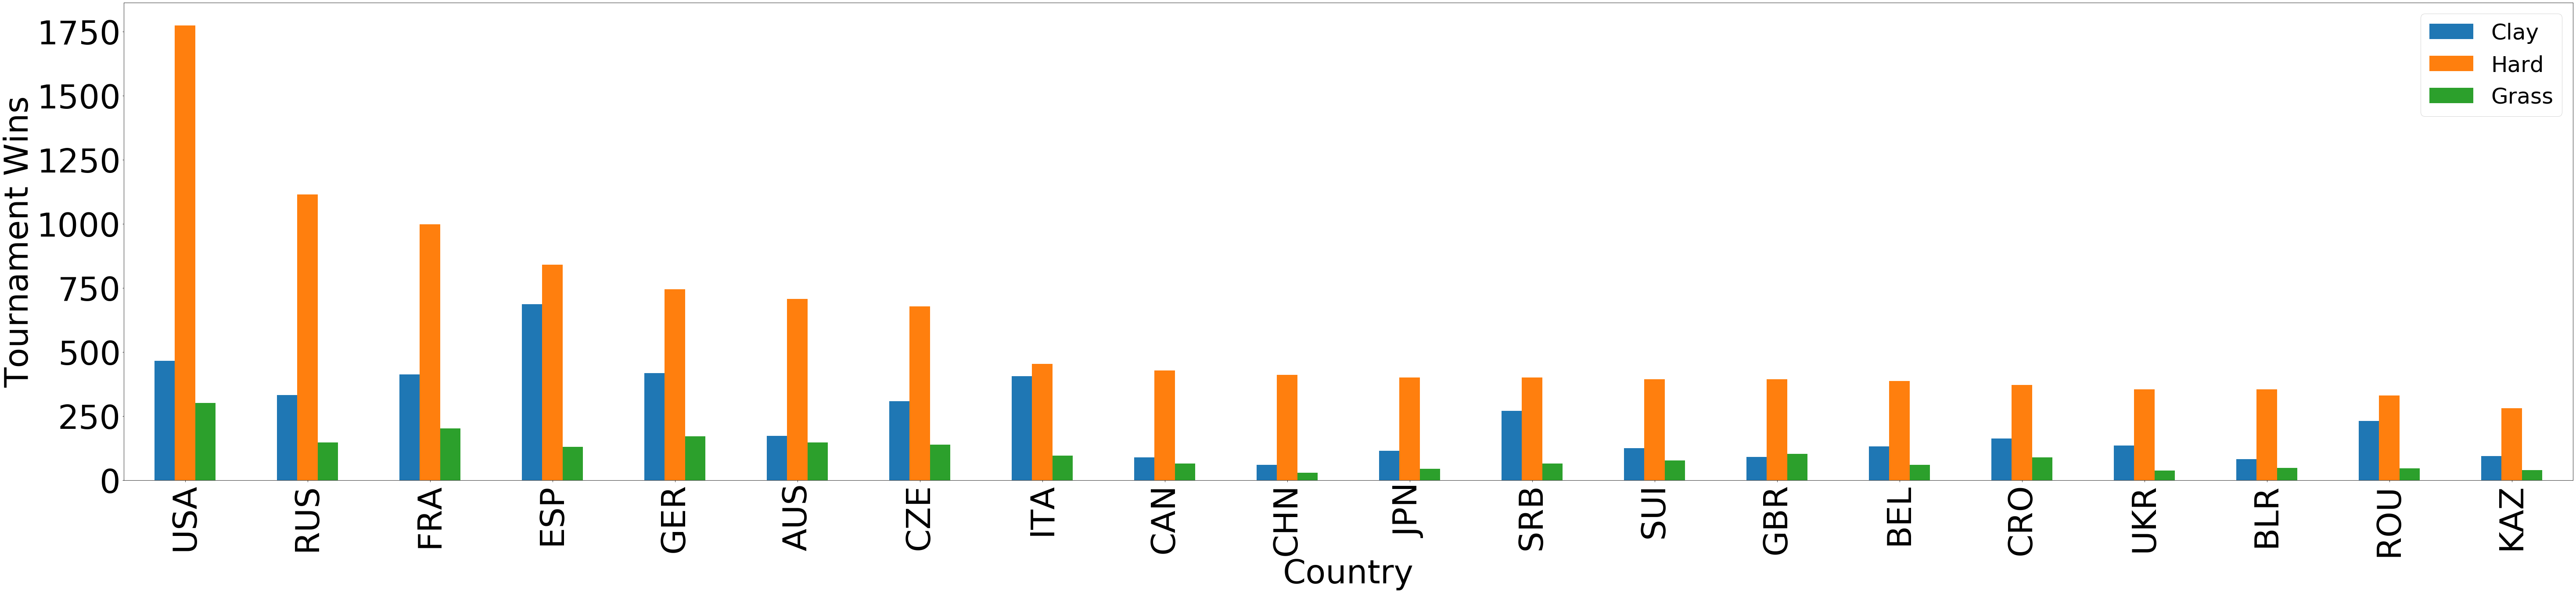

In [25]:
#plotting the surfaces on bar chart based on the ranked by the number of wins on hard
plot_atp_wta_surface_country_clean_sort_hard_df=atp_wta_surface_country_clean_sort_hard_df.head(20).plot(kind="bar",figsize=(100,20),fontsize=75)
plt.xlabel("Country",fontsize=75)
plt.ylabel("Tournament Wins",fontsize=75)
plt.legend(prop={"size":50})
plt.savefig("Output/surface_wins_men_women_top_20_hard.png")
plt.xticks(rotation=90)

# needed to clear the figure
plt.show()

In [26]:
#sorted by the number of wins on clay surface
atp_wta_surface_country_clean_sort_clay_df=atp_wta_surface_country_clean_df.sort_values("Clay",ascending=False)
atp_wta_surface_country_clean_sort_clay_df

,Clay,Hard,Grass
ESP,686.0,840.0,129.0
USA,465.0,1774.0,301.0
GER,418.0,744.0,170.0
FRA,412.0,998.0,201.0
ARG,411.0,277.0,31.0
...,...,...,...
SGP,0.0,4.0,0.0
SAM,0.0,3.0,0.0
OMA,0.0,2.0,0.0
PAK,0.0,7.0,9.0


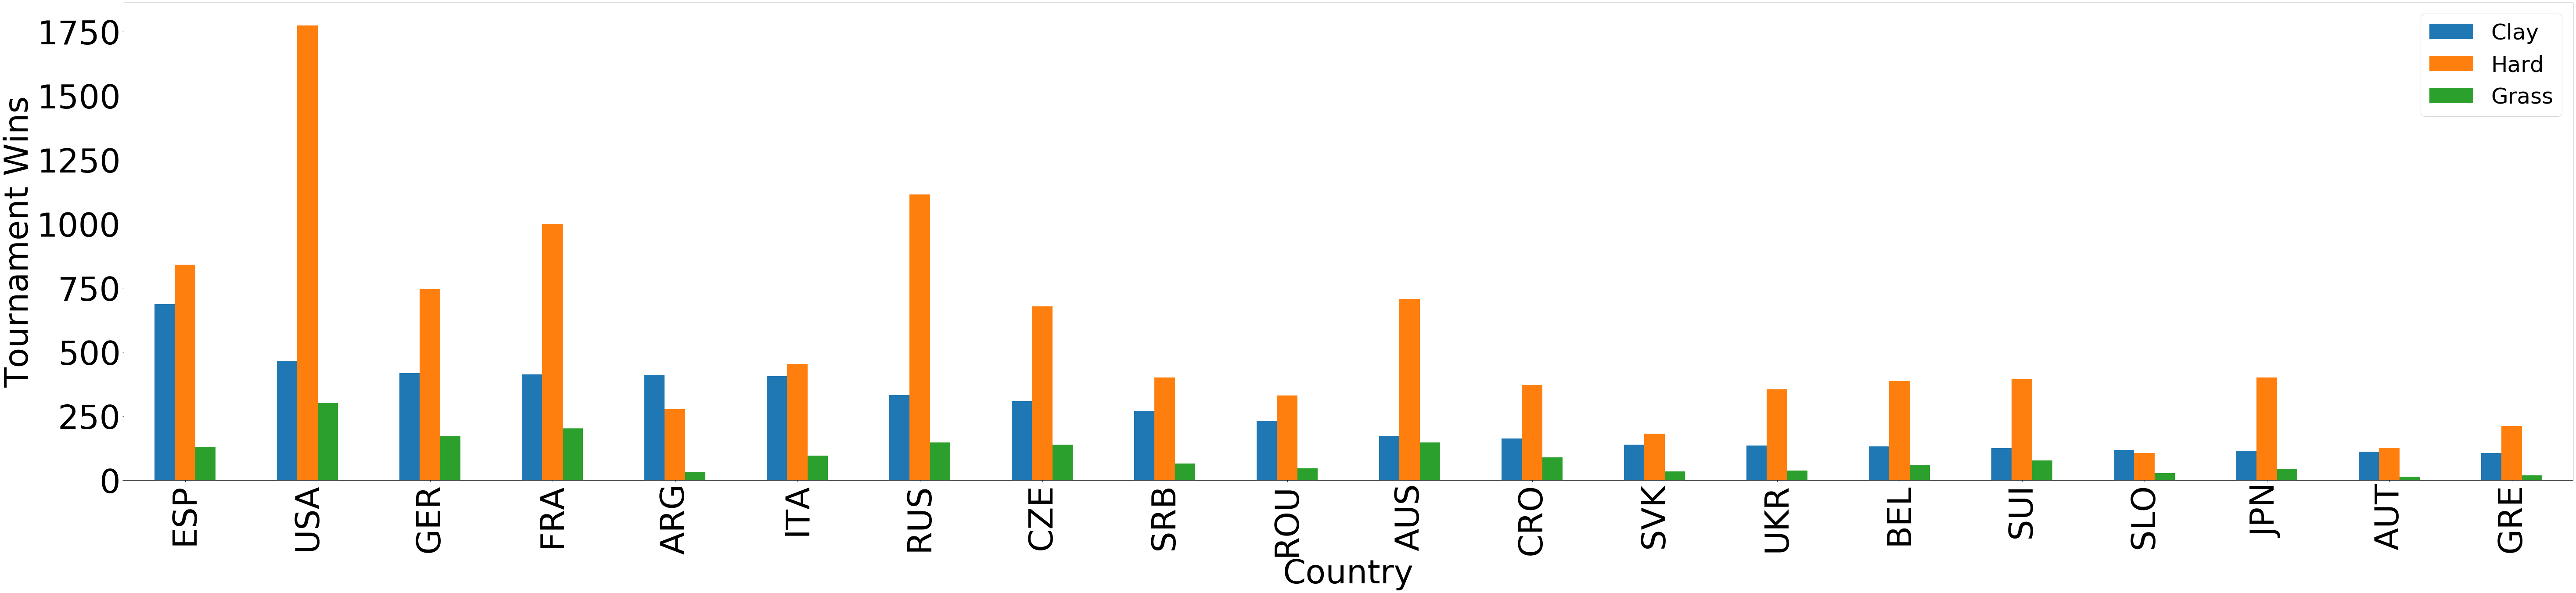

In [27]:
#plotting the surfaces on bar chart based on the ranked by the number of wins on clay
plot_atp_wta_surface_country_clean_sort_clay_df=atp_wta_surface_country_clean_sort_clay_df.head(20).plot(kind="bar",figsize=(100,20),fontsize=75)
plt.xlabel("Country",fontsize=75)
plt.ylabel("Tournament Wins",fontsize=75)
plt.legend(prop={"size":50})
plt.savefig("Output/surface_wins_men_women_top_20_clay.png")
plt.xticks(rotation=90)
plt.show()

# Right Hand VS. Left Hand

In [28]:
# Drop rows that contain string value 'U' in 'Winner_Hand' and 'Loser_Hand'
atp_u = atp_data[atp_data['Winner_Hand'].str.contains('U')==False]
atp_u2 = atp_data[atp_data['Loser_Hand'].str.contains('U')==False]

# Make new dataframe and remove rows with Blank/NaN values in any column of dataframe
atp_data2 = atp_u2.copy()
atp_data2.dropna(subset=["Winner_Hand","Loser_Hand"],inplace=True)

In [29]:
# Drop rows that contain string value 'U' in 'Winner_Hand' and 'Loser_Hand'
wta_u = wta_data[wta_data['Winner_Hand'].str.contains('U')==False]
wta_u2 = wta_u[wta_u['Loser_Hand'].str.contains('U')==False]

# Make new dataframe and remove rows with Blank/NaN values in any column of dataframe
wta_data2 = wta_u2.copy()
wta_data2.dropna(subset=["Winner_Hand","Loser_Hand"],inplace=True)

In [30]:
#Created winning hand ATP
atp_hand = atp_data2["Winner_Hand"]
atp_hand.value_counts()

R    10790
L     1738
U       81
Name: Winner_Hand, dtype: int64

In [31]:
#Created winning hand WTA
wta_hand = wta_data2["Winner_Hand"]
wta_hand.value_counts()

R    10652
L     1004
Name: Winner_Hand, dtype: int64

#  ATP Hand by Winners (Mens)

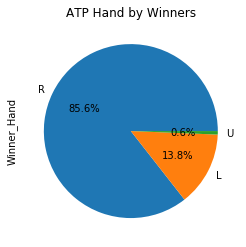

In [32]:
# if there is more left handers than in the normal population (10-15%) then there may be a significant advantage
# Pie Chart
atp_hand.value_counts().plot.pie(autopct="%1.1f%%")
plt.title("ATP Hand by Winners")

# save figure
plt.savefig("Fred/ATP Hand by Winners (Mens).png")
plt.show()

# WTA Hand by Winners (Womens)

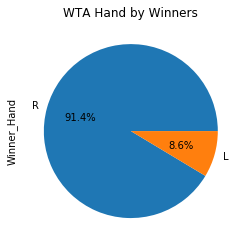

In [33]:
# Pie Chart
wta_hand.value_counts().plot.pie(autopct="%1.1f%%")
plt.title("WTA Hand by Winners")

# save figure
plt.savefig("Fred/WTA Hand by Winners (Womens).png")
plt.show()

# ATP - Top 16 Hand by Winners (Quarterfinals and up)

In [34]:
# does it matter based on placement? it may matter in the upper half where the margin of skill is theoretically thinner
#creating DF of the top 16
atp_top16_df = atp_data2.loc[atp_data2["Tournament_Placement"].isin(["F","SF","QF"])]

In [35]:
# find the hands of the top 16 winners
atp_top16_hand = atp_top16_df["Winner_Hand"]

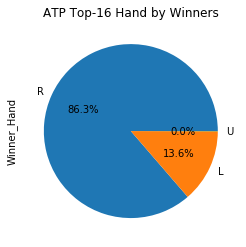

In [36]:
# Pie Chart
atp_top16_hand.value_counts().plot.pie(autopct="%1.1f%%")
plt.title("ATP Top-16 Hand by Winners")

# save figure
plt.savefig("Fred/ATP Top-16 Hand by Winners (Quarterfinals and up).png")
plt.show()

# ATP Other Hand by Winners (Below Quarterfinals)

In [37]:
# would it matter in the lower end? 
#creating DF of the rounds below Quarterfinals
atp_other_df = atp_data2.loc[atp_data2["Tournament_Placement"].isin(["RR","R128","R64","R32","R16","BR"])]

In [38]:
# find the hands of other winners
atp_other_hand = atp_other_df["Winner_Hand"]

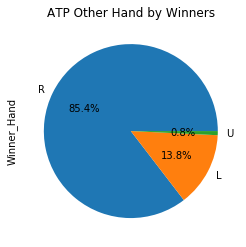

In [39]:
# Pie Chart
atp_other_hand.value_counts().plot.pie(autopct="%1.1f%%")
plt.title("ATP Other Hand by Winners")

# save figure
plt.savefig("Fred/ATP Other Hand by Winners (Below Quarterfinals).png")
plt.show()

# WTA Top 16 Hand by Winners (Quarterfinals and up)

In [40]:
# splitting just at the winners
#creating DF of the top 16
wta_top16_df = wta_data2.loc[wta_data2["Tournament_Placement"].isin(["F","SF","QF"])]

In [41]:
# same as with mens version
wta_top16_hand = wta_top16_df["Winner_Hand"]

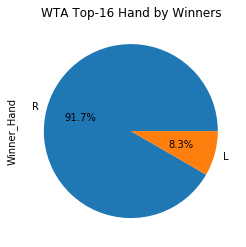

In [42]:
# Pie Chart
wta_top16_hand.value_counts().plot.pie(autopct="%1.1f%%")
plt.title("WTA Top-16 Hand by Winners")


# save figure
plt.savefig("Fred/WTA Top 16 Hand by Winners (Quarterfinals and up).png")
plt.show()

# WTA Other Hand by Winners (Below Quarterfinals)

In [43]:
#creating DF of the rounds below Quarterfinals
wta_other_df = wta_data2.loc[wta_data2["Tournament_Placement"].isin(["RR","R128","R64","R32","R16","BR"])]

In [44]:
# same as with mens version
wta_other_hand = wta_other_df["Winner_Hand"]
wta_other_hand.value_counts()

R    9016
L     855
Name: Winner_Hand, dtype: int64

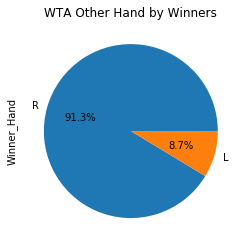

In [45]:
# Pie Chart
wta_other_hand.value_counts().plot.pie(autopct="%1.1f%%")
plt.title("WTA Other Hand by Winners")


# save figure
plt.savefig("Fred/WTA Other Hand by Winners (Below Quarterfinals).png")
plt.show()

# ATP Right Hander Win Rate (vs. Left Hander)

In [46]:
# looking at the match up specifically
#Filtering Right Hander wins vs Left Hander
atp_right = atp_data2.loc[(atp_data2["Winner_Hand"]=="R") & (atp_data2["Loser_Hand"]=="L")]
#Filtering Right Hander wins vs Left Hander
atp_right2 = atp_data2.loc[(atp_data2["Winner_Hand"]=="L") & (atp_data2["Loser_Hand"]=="R")]
#Finding win percents
r_o_l = round(len(atp_right) / len(atp_data2),2) * 100
l_o_r = round(len(atp_right2) / len(atp_data2),2) * 100

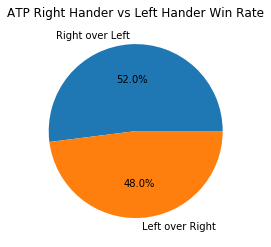

In [47]:
# Pie Chart
newlist = [r_o_l, l_o_r]
newlabels = ["Right over Left","Left over Right"]

#labels 
plt.title("ATP Right Hander vs Left Hander Win Rate")
plt.pie(newlist, labels=newlabels, autopct="%1.1f%%")

# save figure
plt.savefig("Fred/ATP Right Hander Win Rate (vs. Left Hander).png")
plt.show()

# WTA Right Hander Win Rate (vs. Left Hander)

In [48]:
#filter for match ups against right and left and left and right
wta_right = wta_data2.loc[(wta_data2["Winner_Hand"]=="R") & (wta_data2["Loser_Hand"]=="L")]
wta_right2 = wta_data2.loc[(wta_data2["Winner_Hand"]=="L") & (wta_data2["Loser_Hand"]=="R")]
r_o_l3 = round(len(wta_right) / len(wta_data2),2) * 100
l_o_r3 = round(len(wta_right2) / len(wta_data2),2) * 100

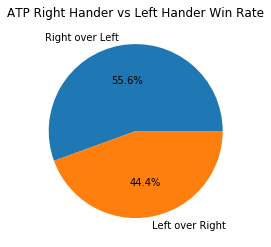

In [49]:
# Pie Chart
newlist3 = [r_o_l3, l_o_r3]
newlabels3 = ["Right over Left","Left over Right"]

plt.title("ATP Right Hander vs Left Hander Win Rate")
plt.pie(newlist3, labels=newlabels3, autopct="%1.1f%%")

# save figure
plt.savefig("Fred/WTA Right Hander Win Rate (vs. Left Hander).png")
plt.show()

# ATP / WTA Left-hander vs. Right-hander Win Rate
* Hypothesis : Left-handers have competitive advantage over Right-handers.
* Observation : Left-handers do NOT have competitive advantage over Right-handers.

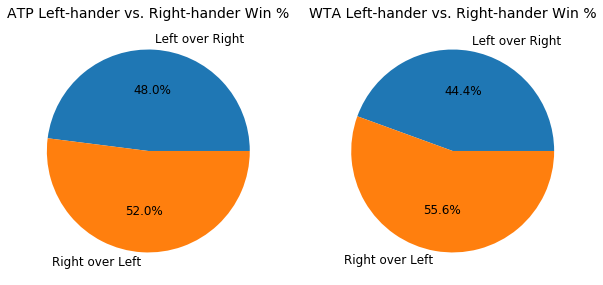

In [50]:
# final graphic
# placed both pie charts side by side for comparison
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))

labels = ["Left over Right","Right over Left"]
values = [l_o_r, r_o_l]
ax1.pie(values, labels=labels, autopct="%1.1f%%", textprops={"fontsize":12})
ax1.set_title("ATP Left-hander vs. Right-hander Win %", fontsize=14)

labels = ["Left over Right","Right over Left"]
values = [l_o_r3, r_o_l3]
ax2.pie(values, labels=labels, autopct="%1.1f%%", textprops={"fontsize":12})
ax2.set_title("WTA Left-hander vs. Right-hander Win %", fontsize=14)

# save figure
plt.savefig("Output/Left-hander vs. Right-hander Win Rate.png")
plt.show()

# Age Comparison

In [51]:
# creating DF based mean ages
wag = atp_data["Winner_Age"]
round(wag.mean(axis=0),0)
#sorted by values
wag.sort_values(ascending=False)
wag.value_counts().head(5)

30.020534    15
25.253936    15
21.749487    15
20.711841    14
22.992471    14
Name: Winner_Age, dtype: int64

In [52]:
#check mode
wagmode = wag.mode()
wagmode

0    21.749487
1    25.253936
2    30.020534
dtype: float64

In [53]:
#checked the range of ages
wag.min()
wag.max()

42.3682409309

In [54]:
#Created bins for all data
bins = pd.cut(wag,9)
groups = wag.groupby(bins)
group = round(groups.count(),0)

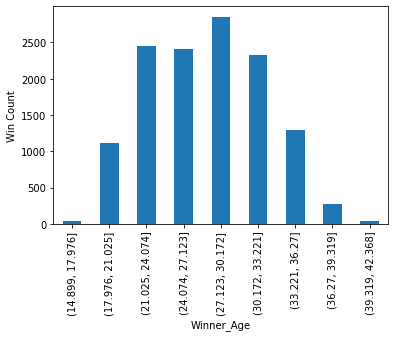

In [55]:
#Overall Graph
plt.figure()

ax = group.plot(kind='bar')
ax.set_ylabel("Win Count")
plt.savefig("Samuel/ATP Winners by Age.png", bbox_inches="tight")
plt.show()

In [56]:
#created new DF by best of rounds

mvf3 = atp_data[atp_data["Match Format"] == 3]
mvf5 = atp_data[atp_data["Match Format"]==5]

#rounded
mvf3 = atp_data["Winner_Age"].round(0)
mvf5 = atp_data["Winner_Age"].round(0)


In [57]:
#Created bins for best of 3
bins3 = pd.cut(mvf3,9)
groups = mvf3.groupby(bins3)
group3 = groups.count()

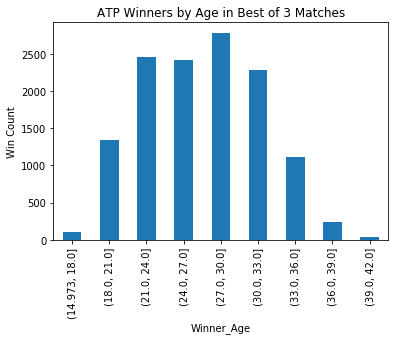

In [58]:
#Graph for best of 3
plt.figure()
plt.title("ATP Winners by Age in Best of 3 Matches")


ax = group3.plot(kind='bar')
ax.set_ylabel("Win Count")
plt.savefig("ATP Winners by Age in Best of 3 Matches")
plt.show()


In [59]:
#Created bins for best of 5
bins5 = pd.cut(mvf5,9)
groups = mvf5.groupby(bins5)
group5 = groups.count()

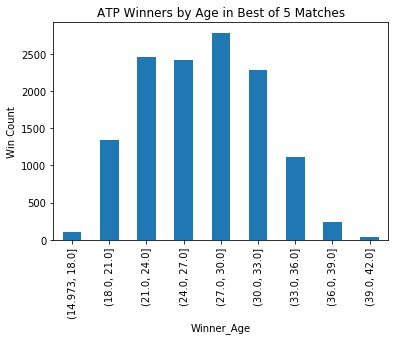

In [60]:
#Graph of best of 5
plt.figure()
plt.title("ATP Winners by Age in Best of 5 Matches")

ax = group5.plot(kind='bar')
ax.set_ylabel("Win Count")
plt.savefig("Output/ATP Winners by Age in Best of 5 Matches.png", bbox_inches="tight")
plt.show()

# WTA Code

In [61]:
# creating DF based mean ages
wtag = wta_data["Winner_Age"]
round(wtag.mean(axis=0),0)

26.0

In [62]:
#check mode
wtagmode = wtag.mode()
wtagmode

0    23.274470
1    25.114305
2    26.674880
dtype: float64

In [63]:
#sorted by values
wtag.sort_values(ascending=False)
wtag.value_counts().head(5)

23.274470    17
25.114305    17
26.674880    17
24.895277    16
26.379192    16
Name: Winner_Age, dtype: int64

In [64]:
#checked the range of ages
wtag.min()
wtag.max()

#Created bins for all data
bins_wta = pd.cut(wtag,9)
groups_wta = wtag.groupby(bins_wta)
group_wta = groups_wta.count()

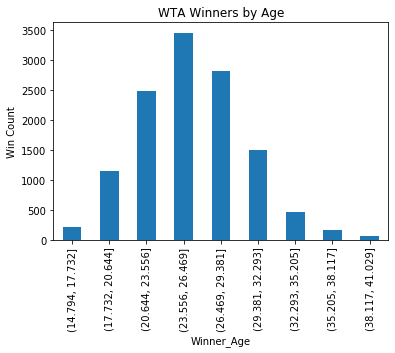

In [65]:
#Overall Graph
plt.figure()
plt.title("WTA Winners by Age")

ax = group_wta.plot(kind='bar')
ax.set_ylabel("Win Count")
plt.savefig("Output/WTA Winners by Age in Best of 3 Matches,png")
plt.show()

# Top 20 Players Over the Past 5 Years

In [66]:
#sorting data by years
atp_2017=atp_data.loc[(atp_data["Year"]==2017)]
atp_2018=atp_data.loc[(atp_data["Year"]==2018)]
atp_2019=atp_data.loc[(atp_data["Year"]==2019)]
atp_2020=atp_data.loc[(atp_data["Year"]==2020)]
atp_2021=atp_data.loc[(atp_data["Year"]==2021)]

wta_2017=wta_data.loc[(wta_data["Year"]==2017)]
wta_2018=wta_data.loc[(wta_data["Year"]==2018)]
wta_2019=wta_data.loc[(wta_data["Year"]==2019)]
wta_2020=wta_data.loc[(wta_data["Year"]==2020)]
wta_2021=wta_data.loc[(wta_data["Year"]==2021)]

In [67]:
#sorting years dataframes for only the winners of F, SF, QF

atp_2017_finalists_df=atp_2017.loc[(atp_2017["Tournament_Placement"]=="F")|(atp_2017["Tournament_Placement"]=="SF")|(atp_2017["Tournament_Placement"]=="QF")]
atp_2018_finalists_df=atp_2018.loc[(atp_2018["Tournament_Placement"]=="F")|(atp_2018["Tournament_Placement"]=="SF")|(atp_2018["Tournament_Placement"]=="QF")]
atp_2019_finalists_df=atp_2019.loc[(atp_2019["Tournament_Placement"]=="F")|(atp_2019["Tournament_Placement"]=="SF")|(atp_2019["Tournament_Placement"]=="QF")]
atp_2020_finalists_df=atp_2020.loc[(atp_2020["Tournament_Placement"]=="F")|(atp_2020["Tournament_Placement"]=="SF")|(atp_2020["Tournament_Placement"]=="QF")]
atp_2021_finalists_df=atp_2021.loc[(atp_2021["Tournament_Placement"]=="F")|(atp_2021["Tournament_Placement"]=="SF")|(atp_2021["Tournament_Placement"]=="QF")]


wta_2017_finalists_df=wta_2017.loc[(wta_2017["Tournament_Placement"]=="F")|(wta_2017["Tournament_Placement"]=="SF")|(wta_2017["Tournament_Placement"]=="QF")]
wta_2018_finalists_df=wta_2018.loc[(wta_2018["Tournament_Placement"]=="F")|(wta_2018["Tournament_Placement"]=="SF")|(wta_2018["Tournament_Placement"]=="QF")]
wta_2019_finalists_df=wta_2019.loc[(wta_2019["Tournament_Placement"]=="F")|(wta_2019["Tournament_Placement"]=="SF")|(wta_2019["Tournament_Placement"]=="QF")]
wta_2020_finalists_df=wta_2020.loc[(wta_2020["Tournament_Placement"]=="F")|(wta_2020["Tournament_Placement"]=="SF")|(wta_2020["Tournament_Placement"]=="QF")]
wta_2021_finalists_df=wta_2021.loc[(wta_2021["Tournament_Placement"]=="F")|(wta_2021["Tournament_Placement"]=="SF")|(wta_2021["Tournament_Placement"]=="QF")]

In [68]:
#grouping wta data by Winner_Name and finding the number of times they won wach year
atp_2017_groups=atp_2017_finalists_df.groupby(["Winner_Name"])
atp_count_2017=atp_2017_groups["Winner_Name"].count()
atp_2018_groups=atp_2018_finalists_df.groupby(["Winner_Name"])
atp_count_2018=atp_2018_groups["Winner_Name"].count()
atp_2019_groups=atp_2019_finalists_df.groupby(["Winner_Name"])
atp_count_2019=atp_2019_groups["Winner_Name"].count()
atp_2020_groups=atp_2020_finalists_df.groupby(["Winner_Name"])
atp_count_2020=atp_2020_groups["Winner_Name"].count()
atp_2021_groups=atp_2021_finalists_df.groupby(["Winner_Name"])
atp_count_2021=atp_2021_groups["Winner_Name"].count()

#using the number of wins and creating a DF
atp_points_df=pd.DataFrame({"2017":atp_count_2017, "2018":atp_count_2018, "2019":atp_count_2019, "2020":atp_count_2020, "2021":atp_count_2021})

#filled empty values with 0
atp_points_df=atp_points_df.fillna(0)

#Sum the wins each year
atp_points_df["total"]=atp_points_df.sum(axis=1)

#sorted by total number of points
atp_points_df=atp_points_df.sort_values(["total"],ascending=False)
atp_top_20_total=atp_points_df.head(20)
atp_top_20_total

,2017,2018,2019,2020,2021,total
Novak Djokovic,9.0,18.0,20.0,17.0,21.0,85.0
Rafael Nadal,26.0,17.0,20.0,8.0,7.0,78.0
Alexander Zverev,19.0,19.0,9.0,11.0,20.0,78.0
Daniil Medvedev,3.0,11.0,25.0,7.0,20.0,66.0
Roger Federer,23.0,20.0,17.0,1.0,0.0,61.0
Stefanos Tsitsipas,1.0,11.0,19.0,9.0,16.0,56.0
Dominic Thiem,9.0,15.0,20.0,6.0,1.0,51.0
Andrey Rublev,4.0,3.0,5.0,15.0,15.0,42.0
Roberto Bautista Agut,10.0,10.0,6.0,5.0,5.0,36.0
John Isner,9.0,8.0,8.0,2.0,5.0,32.0


In [69]:
#grouping wta data by Winner_Name and finding the number of times they won wach year
wta_2017_groups=wta_2017_finalists_df.groupby(["Winner_Name"])
wta_count_2017=wta_2017_groups["Winner_Name"].count()
wta_2018_groups=wta_2018_finalists_df.groupby(["Winner_Name"])
wta_count_2018=wta_2018_groups["Winner_Name"].count()
wta_2019_groups=wta_2019_finalists_df.groupby(["Winner_Name"])
wta_count_2019=wta_2019_groups["Winner_Name"].count()
wta_2020_groups=wta_2020_finalists_df.groupby(["Winner_Name"])
wta_count_2020=wta_2020_groups["Winner_Name"].count()
wta_2021_groups=wta_2021_finalists_df.groupby(["Winner_Name"])
wta_count_2021=wta_2021_groups["Winner_Name"].count()

#using the number of wins and creating a DF
wta_points_df=pd.DataFrame({"2017":wta_count_2017, "2018":wta_count_2018, "2019":wta_count_2019, "2020":wta_count_2020, "2021":wta_count_2021})

#filled empty values with 0
wta_points_df=wta_points_df.fillna(0)

#Sum the wins each year
wta_points_df["total"]=wta_points_df.sum(axis=1)

#sorted by total number of points
wta_points_df=wta_points_df.sort_values(["total"],ascending=False)
wta_top_20_total=wta_points_df.head(20)
wta_top_20_total

,2017,2018,2019,2020,2021,total
Ashleigh Barty,7.0,10.0,17.0,5.0,17.0,56.0
Simona Halep,13.0,17.0,8.0,10.0,4.0,52.0
Karolina Pliskova,13.0,10.0,15.0,5.0,7.0,50.0
Aryna Sabalenka,3.0,11.0,12.0,11.0,11.0,48.0
Elina Svitolina,16.0,12.0,6.0,6.0,6.0,46.0
Petra Kvitova,4.0,16.0,11.0,4.0,5.0,40.0
Garbine Muguruza,11.0,8.0,3.0,4.0,12.0,38.0
Kiki Bertens,7.0,11.0,16.0,3.0,0.0,37.0
Elise Mertens,8.0,11.0,4.0,5.0,7.0,35.0
Caroline Wozniacki,17.0,12.0,3.0,1.0,0.0,33.0


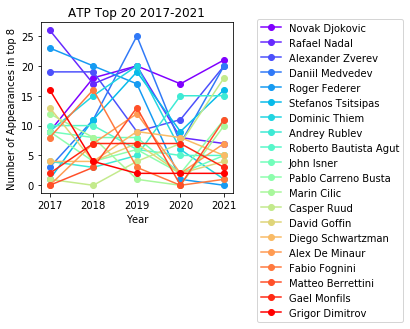

In [70]:
#sorting the total out of DF
atp_top_20=atp_top_20_total.iloc[:,0:5]
atp_top_20

#created loop to plot the data
color = cm.rainbow(np.linspace(0, 1, 20))
i=0
for x in atp_top_20.iterrows():
    labels=x[0]
    plt.plot(x[1].index, x[1].values, label=labels, marker='o',color=color[i])
    plt.legend(loc="best", bbox_to_anchor=(1.1, 1.05))
    i+=1

#Created Labels
plt.xlabel("Year")
plt.ylabel("Number of Appearances in top 8")
plt.title("ATP Top 20 2017-2021") 

#Saved image
plt.tight_layout()
plt.savefig('Output/atp_top_20', dpi = 300)
plt.show()

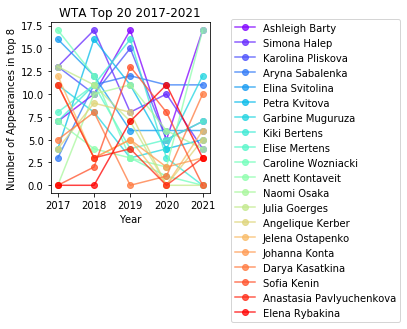

In [71]:
#sorted by total number of points
wta_top_20=wta_top_20_total.iloc[:,0:5]

#created loop to plot the data
color = cm.rainbow(np.linspace(0, 1, 20))
color_list = []
i=0
for x in wta_top_20.iterrows():
    labels=x[0]
    plt.plot(x[1].index, x[1].values, label=labels, marker='o', alpha=0.75,color=color[i])
    plt.legend(loc="best", bbox_to_anchor=(1.1, 1.05))
    color_list.append(color[i])
    i+=1
    
#Created Labels    
plt.xlabel("Year")
plt.ylabel("Number of Appearances in top 8")
plt.title("WTA Top 20 2017-2021")

#Saved image
plt.tight_layout()
plt.savefig('Output/wta_top_20', dpi = 300)
plt.show()

In [74]:
#finding mean, medium, sd, variance of total points
mean_atp = np.mean(atp_top_20_total["total"])
median_atp=np.median(atp_top_20_total["total"])
sd_atp= np.std(atp_top_20_total["total"],ddof = 0)
var_atp= np.var(atp_top_20_total["total"],ddof = 0)

mean_wta = np.mean(wta_top_20_total["total"])
median_wta=np.median(wta_top_20_total["total"])
sd_wta= np.std(wta_top_20_total["total"],ddof = 0)
var_wta= np.var(wta_top_20_total["total"],ddof = 0)

print(f'The mean total points of the ATP League is {mean_atp}.')
print(f'The mean total points of the WTA League is {mean_wta}.')
print(f'The median total points of the ATP League is {median_atp}.')
print(f'The median total points of the WTA League is {median_wta}.')
print(f'The Variance of the total points in the ATP League is {var_atp}.')
print(f'The Variance of the total points in the WTA League is {var_wta}.')
print(f'The Standard Deviation of the total points in the ATP League is {round(sd_atp,2)}.')
print(f'The Standard Deviation of the total points in the WTA League is {round(sd_wta,2)}.')

The mean total points of the ATP League is 43.65.
The mean total points of the WTA League is 34.75.
The median total points of the ATP League is 32.0.
The median total points of the WTA League is 33.0.
The Variance of the total points in the ATP League is 375.9275.
The Variance of the total points in the WTA League is 113.0875.
The Standard Deviation of the total points in the ATP League is 19.39.
The Standard Deviation of the total points in the WTA League is 10.63.
